In [1]:
import os
import jax
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
#
import elisa
from elisa.data.ogip import Data
from elisa.infer.fit import Fit, BayesFit, MaxLikeFit, MLEResult, PosteriorResult
from elisa.models import *
#
path = '/mnt/c/Users/steph/OneDrive/CCNU/SGR-RadiMechan/Data/gbm/bn20210129_070000'
os.chdir(path)
n5 = Data( ( (8.0,30.0) , (40.0,200.0) ), 'glg_tte_n5_bn20210129_070000.FITS',
          'glg_tte_n5_bn20210129_070000.BAK', 'glg_cspec_n5_bn20210129_070000.rsp',
          group='opt',
          )

n2 = Data( ( (8.0,30.0) , (40.0,200.0) ), 'glg_tte_n2_bn20210129_070000.FITS',
          'glg_tte_n2_bn20210129_070000.BAK', 'glg_cspec_n2_bn20210129_070000.rsp',
          group='opt',
          )
# 
datas = [n5, n2]
model_object = BlackbodyRad()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [2]:
mle_object = MaxLikeFit(datas, model_object)
mle_result = mle_object.mle()

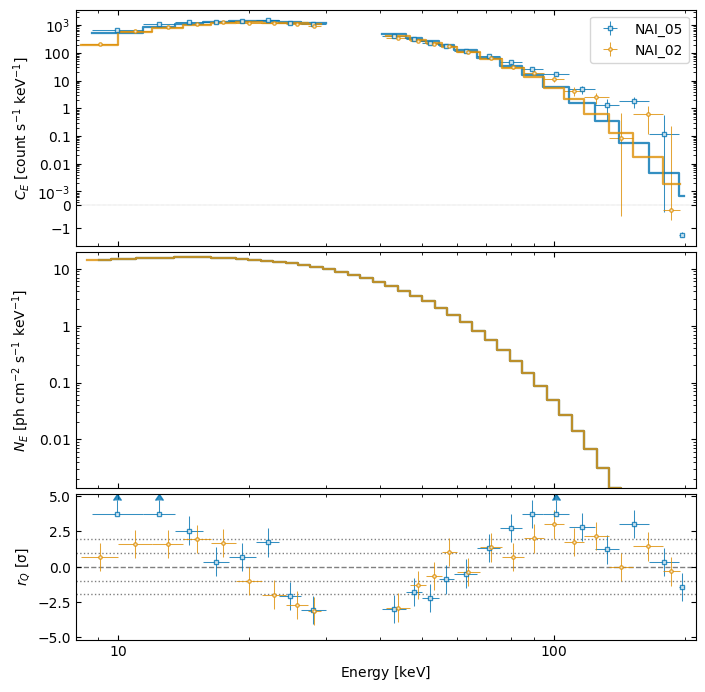

In [28]:
plotter = mle_result.plot
fig_spec = plotter.plot_spec()
for ax in fig_spec.axes:
    for c in ax.collections:
        if isinstance(c, PolyCollection):
            c.set_visible(False)

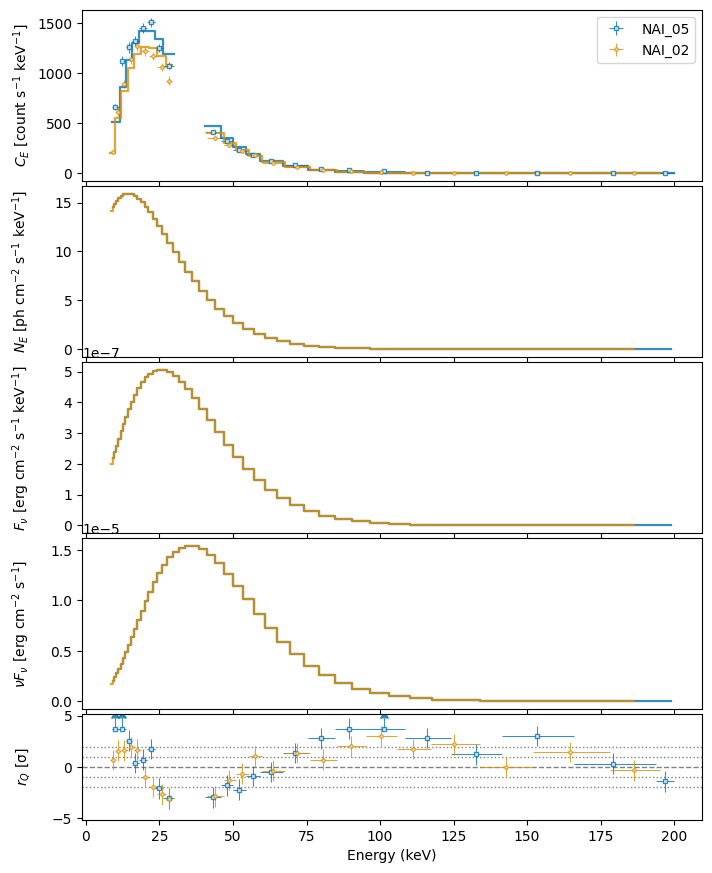

In [27]:
# 
nrows = len(['data' , 'ne' , 'ene' , 'eene' , 'residuals'])
height_ratios = [1.618, 1.618, 1.618, 1.618, 1]
# 
fig, axs = plt.subplots(
    nrows=nrows,
    ncols=1,
    sharex='all',
    height_ratios=height_ratios,
    gridspec_kw={'bottom': 0.07, 'top': 0.97, 'hspace': 0.03},
    figsize=(8, 4 + nrows),
)
fig.align_ylabels(axs)
# 
plotter.plot_ce(axs[0])
plotter.plot_folded(axs[0])
plotter.plot_unfolded(axs[1], mtype='ne')
plotter.plot_unfolded(axs[2], mtype='ene', label_Fv=True)
plotter.plot_unfolded(axs[3], mtype='eene', label_vFv=True)
plotter.plot_residuals(axs[-1])
axs[-1].set_xlabel('Energy (keV)')
for ax in axs:
    for c in ax.collections:
        if isinstance(c, PolyCollection):
            c.set_visible(False)